![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Example: Texture Recognition

This example shows how to use Haralick and Gabor in texture recognition.
References:

* [Haralick's paper](https://www.dropbox.com/s/oijgbbowrhw0iq7/Haralick_Textures.pdf?dl=0)

* [Gabor's paper](https://www.dropbox.com/s/8cr75ivze5m19by/Manjunath_GaborFeatures1996.pdf?dl=0)



In this example the recognition is performed on a well-known database(*) containing 111 textures and each of them with 9 photos. Here are some examples.


(*) [Brodatz](https://multibandtexture.recherche.usherbrooke.ca/colored%20_brodatz.html)



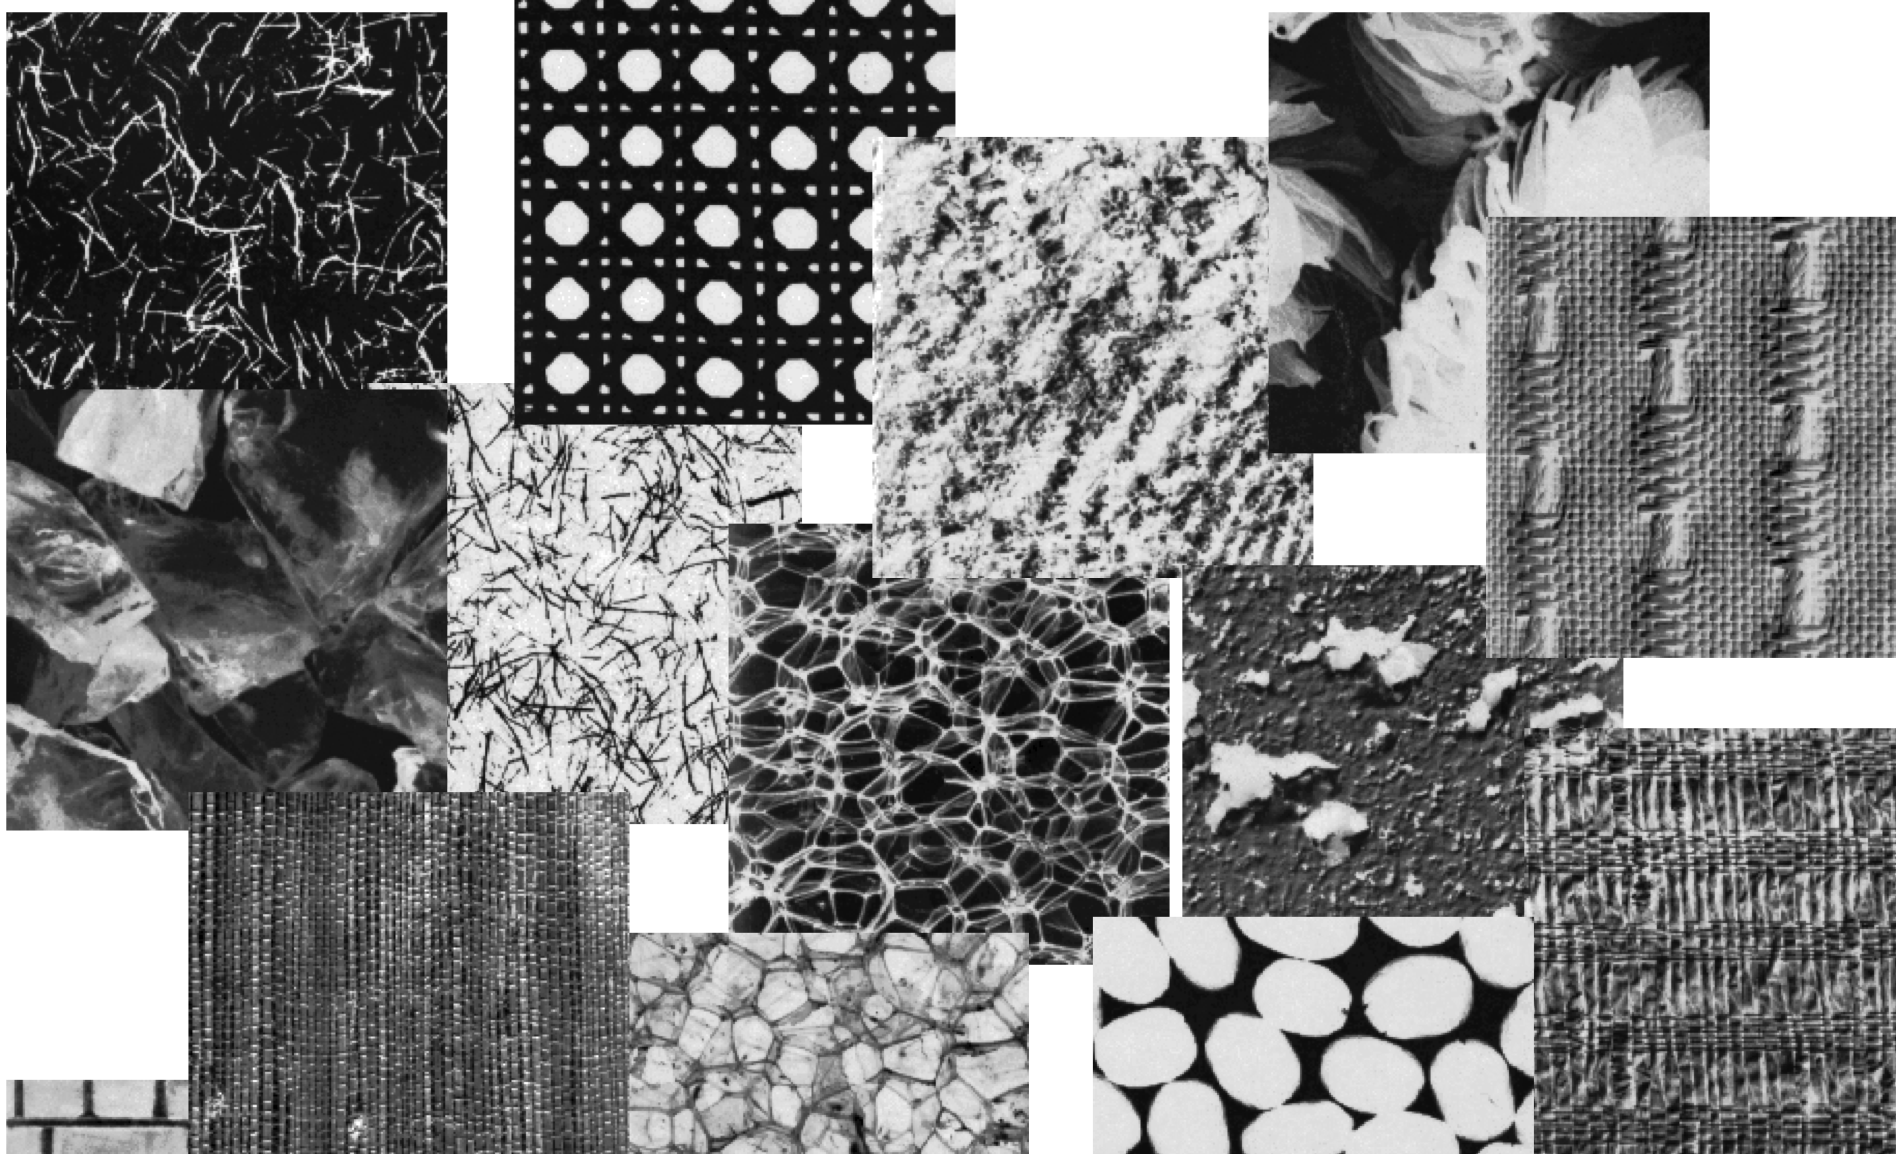

## Libraries

In [ ]:
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 261 (delta 152), reused 177 (delta 74), pack-reused 0
Receiving objects: 100% (261/261), 68.46 KiB | 13.69 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43704 sha256=26e44f56bcb6ef6b878118acbc8d168ccc9636b4e33ae2ca8ffb895310f19d76
  Stored in directory: /tmp/pip-ephem-wheel-cache-h4tndf6_/wheels/9e/f6/a9/3d39da83a3504331129d706f5b04ceb3dbf0ec0f313cdb8fcf
Successfully built balu3


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.neighbors import KNeighborsClassifier
from   seaborn import heatmap
from   tqdm.auto import tqdm
from   balu3.fx.chr import haralick, gabor, lbp
from   balu3.ft.norm import minmax
from   balu3.io.misc import imageload

# Database

The database consists of 111 classes and 9 images per class. They are stored in the textures folder with the format Dxxx_nnn.png, where xxx is the texture ID (001, 002, ... 111) and nnn is the texture picture number (001, 002, ... 009).

In [ ]:
!wget https://www.dropbox.com/s/m1yunmusf91474p/textures.zip
!unzip -qq textures

--2023-07-18 17:02:58--  https://www.dropbox.com/s/m1yunmusf91474p/textures.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/m1yunmusf91474p/textures.zip [following]
--2023-07-18 17:02:59--  https://www.dropbox.com/s/raw/m1yunmusf91474p/textures.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc99269c4eedc8677695fffbdc4a.dl.dropboxusercontent.com/cd/0/inline/CAHMvBBTow1tCAn1_OvxzsJ193MlXSFxSPNzknFpOOCdfLPWzM1IIBS5Px21qnr7mwTfqIvNOuT5SJjcElke_yEbWJMcW26st-cQaDoRtqvhZXsnu7MXvBNdULkTFm9iABDXW9Rpvx6j-k9Umfj8vdn7fyvR8S7-rPS4fZMbXGVXng/file# [following]
--2023-07-18 17:02:59--  https://uc99269c4eedc8677695fffbdc4a.dl.dropboxusercontent.com/cd/0/inline/CAHMvBBTow1tCAn1_OvxzsJ193MlXSFxSPNzknFpOOCdfLPWzM1IIBS5Px21qnr7mwTfqIvNOuT5SJjc

# Example for one image

loading image textures/D002_009.png...
(213, 213)


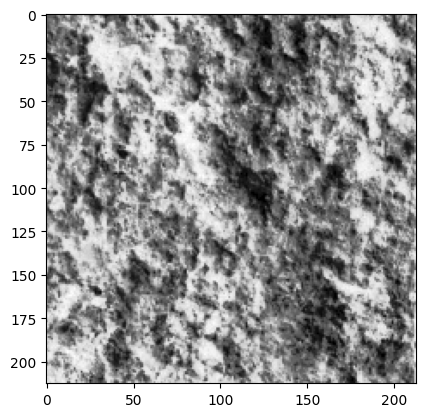

[4.26343423e-01 5.06242557e-01 3.22116163e-01 6.76551020e-01
 1.01272311e-02 1.10473876e-02 8.72773178e-03 1.29751992e-02
 3.64460094e-05 3.30366023e-05 4.10236445e-05 2.81989022e-05
 1.01203390e-05 9.68594431e-06 1.08065300e-05 9.03247476e-06
 3.67280363e-04 3.54117907e-04 3.84434052e-04 3.26052826e-04
 2.34088687e-07 2.14424420e-07 2.66908764e-07 1.86467789e-07
 5.59281834e-01 4.25892733e-01 4.48234904e-01 5.51977815e-01
 8.03271482e-03 6.89098978e-03 7.07006133e-03 7.94532045e-03
 8.21915060e-06 9.82791939e-06 9.63105401e-06 8.50970777e-06
 3.33385725e-06 3.56274219e-06 3.51969558e-06 3.35286366e-06
 9.83598637e-05 1.20239135e-04 1.16454217e-04 9.94979224e-05
 5.84034703e-08 6.66980976e-08 6.50960835e-08 5.90712882e-08
 5.29349936e-01 4.55718899e-01 4.29439368e-01 5.72301197e-01
 6.61073332e-03 6.06420127e-03 5.84449720e-03 6.88868294e-03
 4.46751472e-06 4.75585035e-06 5.13138310e-06 4.06266292e-06
 2.13967052e-06 2.20076320e-06 2.22566643e-06 2.10488024e-06
 4.36688643e-05 5.579511

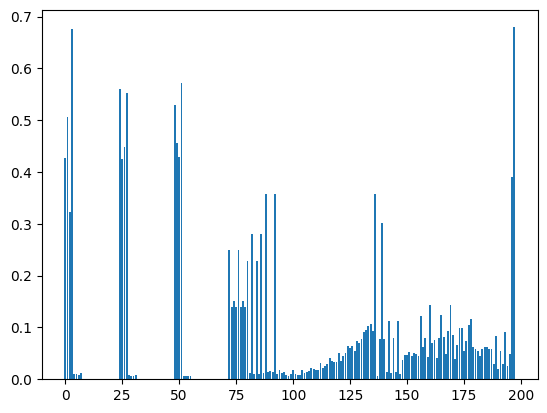

In [ ]:
img = 255*imageload('textures/D',2,3,9,3,echo='on')


print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
f1 = haralick(img,distance=1,norm=True)
f3 = haralick(img,distance=3,norm=True)
f5 = haralick(img,distance=5,norm=True)
fg = gabor(img, norm=True)
fl = lbp(img,norm=True)

ff = np.concatenate((f1,f3,f5,fg,fl))
print(ff)
print(ff.shape)
nf = len(ff)
plt.bar(range(nf),ff)
plt.show()


# Feature extraction

In [ ]:
# WARNING: if K is large and Gabor features are extracted, this process
# can take about 20 minutes!

K      = 111   # number of classes
N      = 9     # number of images per class
MHar1  = 24
MHar3  = 24
MHar5  = 24
Mgab   = 67    # Gabor using Balu3
Mlbp   = 59

XHar1  = np.zeros((K*N,MHar1))   # K x N samples, and Mhar1 features
XHar3  = np.zeros((K*N,MHar3))   # K x N samples, and Mhar3 features
XHar5  = np.zeros((K*N,MHar5))   # K x N samples, and Mhar5 features
XGab   = np.zeros((K*N,Mgab))
Xlbp   = np.zeros((K*N,Mlbp))

y     = np.zeros((K*N),'int')           # ground truth

t = 0

# The images are in textures/D_xxx_nnn.png, where xxx is the number of the class (001, 002, ... 111 in three digits) and nnn is the image number.
# class (001, 002, ... 111 in three digits) and nnn is the number of image
# (001, 002, ... 009 in three digits)

dig_clase = 3
dig_img   = 3
fpath     = 'textures'
prefix    = 'D'
imprefix  = fpath + '/' + prefix

for j in tqdm(range(K)):
  for i in range(N):
    clase     = j+1
    num_img   = i+1
    img       = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img)
    XHar1[t,:] = haralick(img,distance=1)
    XHar3[t,:] = haralick(img,distance=3)
    XHar5[t,:] = haralick(img,distance=5)
    #XGab[t,:]  = gabor(img)
    Xlbp[t,:]  = lbp(img)
    y[t]       = j
    t          = t+1


  0%|          | 0/111 [00:00<?, ?it/s]

# Manual feature selection


In [ ]:

#X = np.concatenate((XHar1,XHar3,XGab,Xlbp), axis=1)
X = np.concatenate((XHar1,XHar3,Xlbp), axis=1)

print('X has '+str(X.shape[0])+' rows, and '+str(X.shape[1])+' columns.')

X has 999 rows, and 107 columns.


# Training/Testing separation

Before designing the classifier, we must split the data into Training subset and Testing subset. In this example, we use one image of each texture for testing and the rest for training:

* Training: the first 8 images of each texture.

* Testing: the last image of each texture

In [ ]:
M = X.shape[1]

Xtrain = np.zeros((K*(N-1),M))
ytrain = np.zeros((K*(N-1)),'int')
Xtest  = np.zeros((K,M))
ytest  = np.zeros((K),'int')

itest  = 8                      # last image for testing, it could be 0,1,..8

ktrain = 0
ktest  = 0
for i in range(K*N):
  if np.mod(i,N)==itest:
    Xtest[ktest,:] = X[i,:]
    ytest[ktest]   = y[i]
    ktest = ktest+1
  else:
    Xtrain[ktrain,:] = X[i,:]
    ytrain[ktrain]   = y[i]
    ktrain = ktrain+1

print('Spliting Training/Testing done.')


print('Xtrain has '+str(Xtrain.shape[0])+' rows, and '+str(Xtrain.shape[1])+' columns.')
print('Xtest  has '+str(Xtest.shape[0])+' rows, and '+str(Xtest.shape[1])+' columns.')

Xtrain, a, b = minmax(Xtrain)
Xtest = Xtest * a + b





Spliting Training/Testing done.
Xtrain has 888 rows, and 107 columns.
Xtest  has 111 rows, and 107 columns.


# Classification using KNN

This example uses the implementation of sklearn for KNN

In [ ]:
neighbors = 1
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
print('Clasification using KNN-'+str(neighbors)+ ' on '+str(K)+' images of testing... done.')

Clasification using KNN-1 on 111 images of testing... done.


# Performance

In [ ]:
acc = accuracy_score(ytest,ypred)
print('Testing Accuracy = '+str(acc*100)+'%')

Testing Accuracy = 96.3963963963964%


Confusion Matrix:


<Axes: >

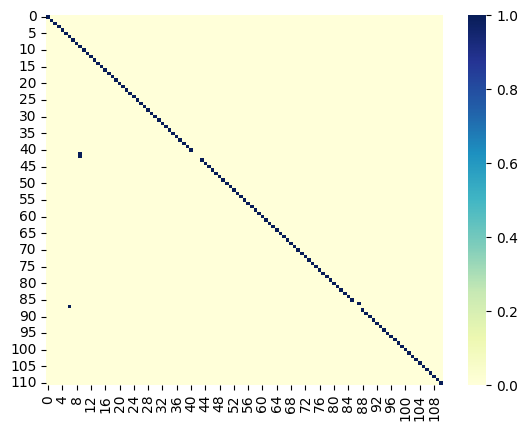

In [ ]:
C = confusion_matrix(ytest,ypred)
print('Confusion Matrix:')
heatmap(C, cmap="YlGnBu")

# Visualization of failed cases

Error: misclassified texture 42 (testing image)...


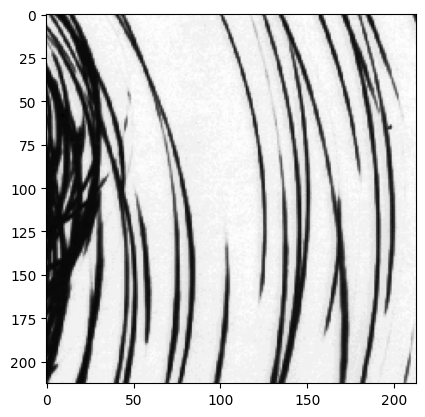

... has classified as texture 10 (training images):


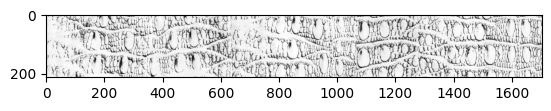

---------------------------------------------
Error: misclassified texture 43 (testing image)...


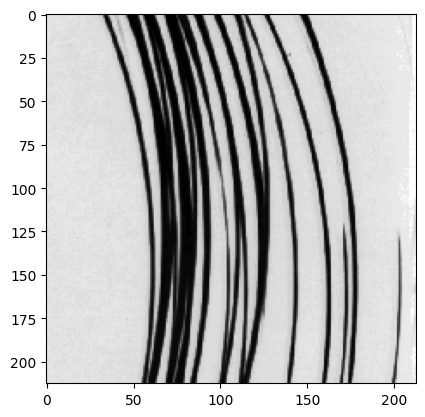

... has classified as texture 10 (training images):


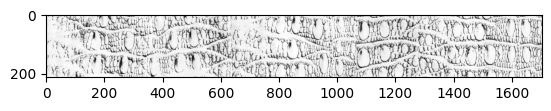

---------------------------------------------
Error: misclassified texture 87 (testing image)...


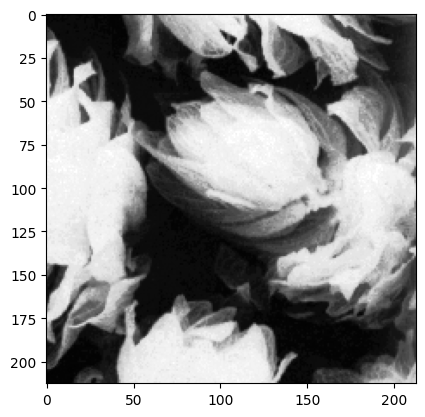

... has classified as texture 88 (training images):


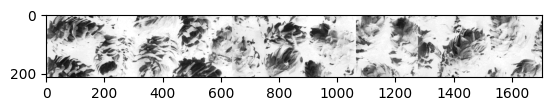

---------------------------------------------
Error: misclassified texture 88 (testing image)...


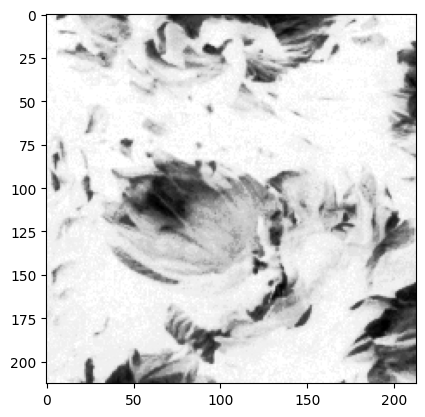

... has classified as texture 7 (training images):


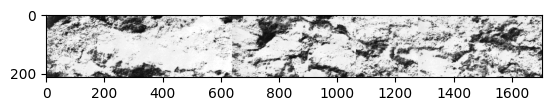

---------------------------------------------


In [ ]:
for i in range(K):
  for j in range(K):
    if i!=j and C[i,j]>0:
      # testing image
      I     = imageload('textures/D',i+1,3,itest+1,3)
      # training image
      ini = 1
      for k in range(N):
        if k!=itest:
          Jk  = imageload('textures/D',j+1,3,k+1,3)
          if ini==1:
            ini = 0
            J = Jk
          else:
            J = cv2.hconcat([J,Jk])
      print('Error: misclassified texture '+str(i+1)+' (testing image)...')
      plt.imshow(I*255,cmap='gray')
      plt.show()
      print('... has classified as texture '+str(j+1)+' (training images):')
      #implot = plt.imshow(IJ,cmap='gray')
      plt.imshow(J*255,cmap='gray')
      plt.show()
      print('---------------------------------------------')

